# Saddle-node bifurcation in 2D:

Consider the following system of non-linear ODEs, where $x$ and $y$ are dynamic variables, and $a$ and $b$ are positive parameters:

$$
\dot{x} = -ax + y
$$

$$
\dot{y} = \frac{x^2}{1+x^2} - by
$$


- Solve the system numerically using Python.

- Enhance the phase portrait by including:

    * The fixed points.
    * The $\dot{x}$-nullcline (where $\dot{x}=0$).
    * The $\dot{y}$-nullcline (where $\dot{y}=0$).
    * The vector field to show the direction and magnitude of the flow across the plane.

- Analyze the dynamics and bifurcation by plotting the phase plane $(x \text{ vs } y)$.

In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
# Define the ODE system
def ode_function(t, pair, a, b):
    """
    Function to calculate the slopes.    
    """
    # Unpack the pair -> for scipy
    x, y = pair
    
    # Slopes
    x_slope = -a*x + y
    y_slope = (x**2)/(1 + x**2) - b*y

    return [x_slope, y_slope]

In [61]:
# Parameters
b = 1.
a_c = 1./(2.*b)
a = 1.1*a_c
print(a, b)
    
# Initial conditions

0.55 1.0


In [62]:
# Define the axes
x_min, x_max = 0., 2.0
y_min, y_max = 0., 1.0

# Resolution
n_x = n_y = 50

# Axes
x = np.linspace(x_min, x_max, n_x)
y = np.linspace(y_min, y_max, n_y)

# Meshgrid
x_2d, y_2d = np.meshgrid(x, y)

### Vector field (U,V):

$$
\dot{x} = -ax + y
$$

$$
\dot{y} = \frac{x^2}{1+x^2} - by
$$

In [63]:
# We need to slopes:
u_2d = -a*x_2d + y_2d
v_2d = (x_2d**2)/(1+x_2d**2) - b*y_2d

# Modulues
m_norm = np.sqrt(u_2d**2 + v_2d**2)
# Normalise vector field
u_norm = u_2d/m_norm
v_norm = v_2d/m_norm

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_64394/1801868659.py:8: RuntimeWarning: invalid value encountered in divide
  u_norm = u_2d/m_norm
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_64394/1801868659.py:9: RuntimeWarning: invalid value encountered in divide
  v_norm = v_2d/m_norm


### Nullclines:

$$
0 = -ax + y
$$

$$
0 = \frac{x^2}{1+x^2} - by
$$

In [64]:
# Evaluate in the axes
x_null = a*x

y_null = (x**2/((1. + x**2)*b))

## Fixed points:

In [65]:
x_0, y_0 = 0, 0
x_1, y_1 = ((1. + np.sqrt(1.-4.*a**2*b**2))/(2*a*b)), a*((1. + np.sqrt(1.-4.*a**2*b**2))/(2*a*b))
x_2, y_2 = ((1. - np.sqrt(1.-4.*a**2*b**2))/(2*a*b)), a*((1. - np.sqrt(1.-4.*a**2*b**2))/(2*a*b))

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_64394/4157242601.py:2: RuntimeWarning: invalid value encountered in sqrt
  x_1, y_1 = ((1. + np.sqrt(1.-4.*a**2*b**2))/(2*a*b)), a*((1. + np.sqrt(1.-4.*a**2*b**2))/(2*a*b))
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_64394/4157242601.py:3: RuntimeWarning: invalid value encountered in sqrt
  x_2, y_2 = ((1. - np.sqrt(1.-4.*a**2*b**2))/(2*a*b)), a*((1. - np.sqrt(1.-4.*a**2*b**2))/(2*a*b))


# First inspection:

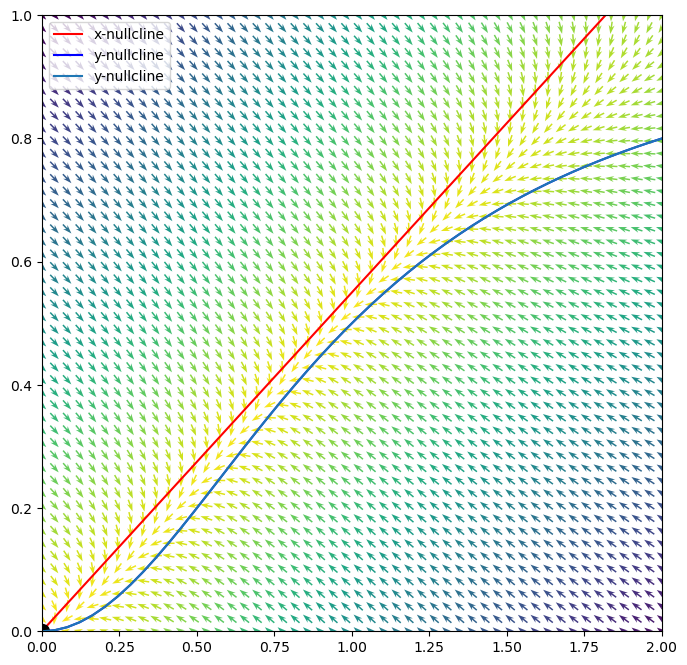

In [66]:
plt.figure(figsize=(8,8))

# Plot the nullclines
plt.plot(x, x_null, label = "x-nullcline", color = "Red")
plt.plot(x, y_null, label = "y-nullcline", color = "Blue")

# Plot the fixed points
plt.plot(x_0, y_0, marker = "o", color = "Black", markersize = 10)
plt.plot(x_1, y_1, marker = "o", color = "Black", markersize = 10)
plt.plot(x_2, y_2, marker = "o", color = "Black", markersize = 10, markerfacecolor="None")
plt.plot(x, y_null, label = "y-nullcline")

# Vector field
plt.quiver(x_2d, y_2d, u_norm, v_norm, m_norm, cmap = plt.cm.viridis_r, scale = 50, headlength= 6,\
          headwidth = 4, pivot = "mid")

plt.xlim(0,2.)
plt.ylim(0,1.)

plt.legend()

plt.show()

## Trajectories:

In [67]:
## Integrate trajectories
#p0 = [1.0, 0.25]
p1 = [0.5, 0.1]

# Time axis
t_span = (0., 100.)
t_axis = np.linspace(t_span[0], t_span[1], 1000)

# Solve the ODE numerically
sln = solve_ivp(ode_function, t_span, p1, args = (a, b), t_eval = t_axis, method = "RK45")

# Extract the solution
x_sln = sln.y[0, :]
y_sln = sln.y[1, :]

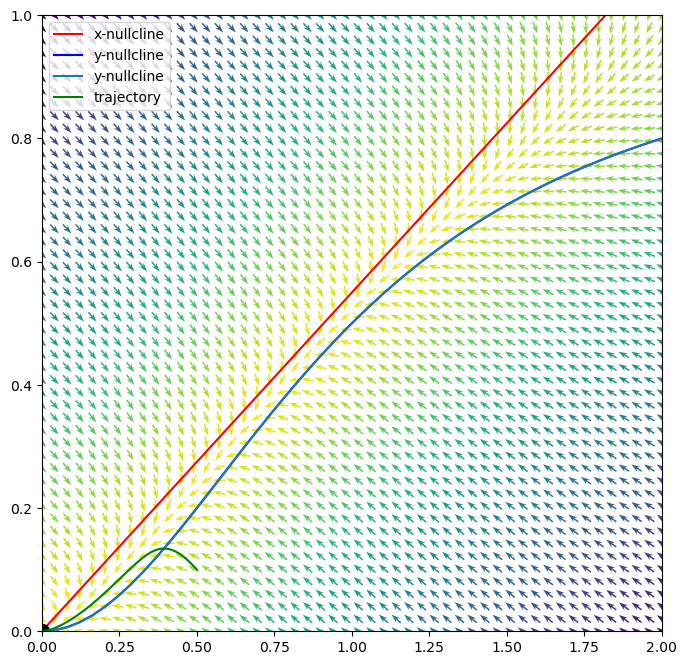

In [68]:
plt.figure(figsize=(8,8))

# Plot the nullclines
plt.plot(x, x_null, label = "x-nullcline", color = "Red")
plt.plot(x, y_null, label = "y-nullcline", color = "Blue")

# Plot the fixed points
plt.plot(x_0, y_0, marker = "o", color = "Black", markersize = 10)
plt.plot(x_1, y_1, marker = "o", color = "Black", markersize = 10)
plt.plot(x_2, y_2, marker = "o", color = "Black", markersize = 10, markerfacecolor="None")
plt.plot(x, y_null, label = "y-nullcline")

# Vector field
plt.quiver(x_2d, y_2d, u_norm, v_norm, m_norm, cmap = plt.cm.viridis_r, scale = 50, headlength= 6,\
          headwidth = 4, pivot = "mid")

# Trajectory
plt.plot(x_sln, y_sln, label = "trajectory", color = "Green")

plt.xlim(0,2.)
plt.ylim(0,1.)

plt.legend()

plt.show()